In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def trapezoid(x,y):
    N=len(x)
    summ = 0
    for i in range(N-1):
        I = 0.5*(y[i]+ y[i+1])*(x[i+1] - x[i])
        summ = summ + I
    return summ



def right_rectangle(x, y,new_epsilon, new_fe, steps):
    
    m = steps + 1
    area = trapezoid(new_epsilon[0:m],new_epsilon[0:m]**(2)*new_fe[0:m])
    y[1] = (area)/((x[1] - x[0])*x[2]**2)
    for i in range(1,len(x)-1):
        m = steps*i
        n = m + 5 
        area = trapezoid(new_epsilon[m:n],new_epsilon[m:n]**(2)*new_fe[m:n])
        y[i + 1] =(area)/((x[i + 1] - x[i])*x[i + 1]**2)
    return y




def factors(value, x):
    tmp_lst = []
    for i in range(1, value + 1):
        if value % i == 0:
            tmp_lst.append(i) 
    if x in tmp_lst: 
        return True
    else:
        
        return False
    
    
def xy_values(file_name, k):
    
    dat = np.load(file_name)
    fe = dat['f_full']
    epsilon = dat['eps_full']
    
    new_epsilon = np.zeros(len(epsilon) + 1)
    new_epsilon[1:] = epsilon
    new_fe = np.zeros(len(fe) + 1)
    new_fe[1:] = fe
    
    value = epsilon.shape[0]
    
    a = factors(value, k)
    
    if a: 
        x = new_epsilon[::k]
        y = np.zeros(len(x))

        return x, right_rectangle(x, y, new_epsilon, new_fe, k)
        
    else:   
        raise Exception(str(k) +' is not a factor of ' + str(value))


**Looks self-contained w/ the plot. The XY function loads the x and y arrays neccesary to lot the number density spectrum**

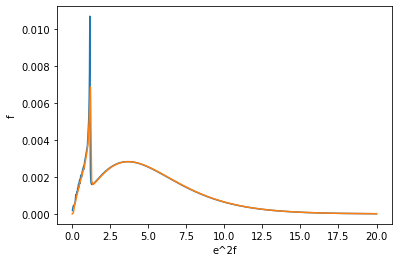

In [3]:
dat = np.load('1x0.00049x3e-09-data.npz')
fe = dat['f_full']
epsilon = dat['eps_full']

a, b = xy_values('1x0.00049x3e-09-data.npz', 4)

plt.figure()
plt.plot(epsilon, epsilon**(2)*fe)
plt.plot(a, a**(2)*b)
plt.xlabel('e^2f')
plt.ylabel("f")
plt.show() ##proportional to a number density spectrum